# Enthalpy data cleanup

In [57]:
import itertools
import csv
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
import glob, os
import pandas as pd

In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
interim_data = '../data/interim'

In [60]:
#take a compound and generate a list of enthalpies
def enthalpy_list(el_list):
    enth_dict = {}
    enth_list = []
    pair_list = []

    for i in itertools.combinations(el_list,2):
        #print (i)
        pair_list.append(i)
        em = float(enth_mat[i[0]][i[1]])
        enth_list.append(em)
        enth_dict[i] = float(em)
        enth_dict[em] = i
        
    return pair_list, enth_list, enth_dict


In [61]:
class compound:

    def __init__(self, name):
        self.name = name
        self.elem_list = []    # creates a new empty list for each dog
        i = 0
        while (i<len(name)):
            n = name[i:i+2]
            self.elem_list.append(n.strip())
            i = i+2
        
        self.pair_list, self.enth_list, self.enth_dict = enthalpy_list(self.elem_list)
        self.avg_enth = np.mean(self.enth_list)

In [62]:
#test new class
#c = compound('AlCoCr')
#print(c.elem_list)
#print(c.pair_list)
#c_min=min(c.enth_list)
#print (c_min,c.enth_dict[c_min])
#print (c.enth_list)
#print(c.pair_list)

In [63]:
def define_enth_mat():
    enthalpy = {}
    enthalpy['Al'] = dict( \
             Al = 0.,\
             Cu = -1.,\
             Ti = -3.)
    enthalpy['Cu'] = dict( \
                         Al = -1., Cu = 0., Ti = 1.)
    enthalpy['Ti'] = dict(Al = -3, Cu = 1., Ti = 0.)
    enthalpy
    enthalpy['Al']
    enthalpy['Al']['Ti']
    
    return enthalpy

In [64]:
def read_enth_mat_csv(csv_name):
    
    print_test = False
    
    enthalpy = {}
    
    with open(csv_name, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        #print(csv_reader)
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                element_names = row
                if (print_test):
                    print(element_names)
                    print(f'element names are {", ".join(element_names)}')
                line_count += 1
            else:
                if (print_test):
                    print(f'\t{row["element"]} interacts with Al with a value of {row["Al"]}.')
                #print(row)
                enthalpy[row["element"]] = row
                     
            line_count += 1
        
        if (print_test):
            print(f'Processed {line_count} lines.')
            print("Al-Ti = ",enthalpy['Al']['Ti'])
        
        return enthalpy


In [65]:
#Define and test enthalpy matrix

#enth_mat = define_enth_mat()
csv_name = 'enthalpy_matrix.csv'
csv_file = os.path.join(interim_data, csv_name)
enth_mat = read_enth_mat_csv(csv_file)
#print(enth_mat)

#compound = ('Al','Cu','Ti','Ni')
#compound = ('Fe', 'Co', 'Cr', 'Mn', 'Ni', 'Pd')
c = compound('FeCoCrMnNiPdAlCuTi')

min_enth = min(c.enth_list)

print('atoms in compound ',c.name,' are ',c.elem_list)
print('pairs are: ',c.pair_list)
print('associated enthalpies for the pairs are: ',c.enth_list)

print ('min enthalpy = ',min_enth, 'for pair ', c.enth_dict[min_enth])

max_enth = max(c.enth_list)
print ('max enthalpy = ',max_enth, 'for pair ', c.enth_dict[max_enth])

atoms in compound  FeCoCrMnNiPdAlCuTi  are  ['Fe', 'Co', 'Cr', 'Mn', 'Ni', 'Pd', 'Al', 'Cu', 'Ti']
pairs are:  [('Fe', 'Co'), ('Fe', 'Cr'), ('Fe', 'Mn'), ('Fe', 'Ni'), ('Fe', 'Pd'), ('Fe', 'Al'), ('Fe', 'Cu'), ('Fe', 'Ti'), ('Co', 'Cr'), ('Co', 'Mn'), ('Co', 'Ni'), ('Co', 'Pd'), ('Co', 'Al'), ('Co', 'Cu'), ('Co', 'Ti'), ('Cr', 'Mn'), ('Cr', 'Ni'), ('Cr', 'Pd'), ('Cr', 'Al'), ('Cr', 'Cu'), ('Cr', 'Ti'), ('Mn', 'Ni'), ('Mn', 'Pd'), ('Mn', 'Al'), ('Mn', 'Cu'), ('Mn', 'Ti'), ('Ni', 'Pd'), ('Ni', 'Al'), ('Ni', 'Cu'), ('Ni', 'Ti'), ('Pd', 'Al'), ('Pd', 'Cu'), ('Pd', 'Ti'), ('Al', 'Cu'), ('Al', 'Ti'), ('Cu', 'Ti')]
associated enthalpies for the pairs are:  [-60.0, -8.0, 9.0, -97.0, -116.0, -369.0, 65.0, -418.0, 5.0, -19.0, -21.0, -10.0, -629.0, 54.0, -386.0, -110.0, -30.0, -82.0, -138.0, 108.0, -910.0, -115.0, -251.0, -278.0, 29.0, -277.0, -6.0, -677.0, -6.0, -435.0, -874.0, -126.0, -646.0, -224.0, -428.0, -147.0]
min enthalpy =  -910.0 for pair  ('Cr', 'Ti')
max enthalpy =  108.0 for pair  (

In [149]:
enthalpy_df = pd.read_csv(csv_file, index_col='element')
enthalpy_df.head()

,Mg,Al,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,...,Cd,La,Hf,Ta,W,Re,Os,Ir,Pt,Au
element,,,,,,,,,,,,,,,,,,,,,
Mg,0,-33,2,20,171,160,87,77,-31,-723,...,-109,-140,-7,122,234,67,43,-369,-872,-612
Al,-33,0,-444,-428,-282,-138,-278,-369,-629,-677,...,-1938,-360,-444,-320,-161,-257,-577,-944,-960,-466
Sc,2,-444,0,38,83,119,-142,-281,-359,-525,...,-296,33,-10,75,44,-341,-400,-1032,-1232,-822
Ti,20,-428,38,0,37,-910,-277,-418,-386,-435,...,-69,134,-10,31,-82,-189,-713,-847,-934,-430
V,171,-282,83,37,0,-88,-286,-176,-199,-250,...,133,170,7,-122,-97,-148,-361,-505,-564,-43


In [151]:
elements = list(enthalpy_df.columns)

In [152]:
# read compound files
comp_files = {'mixed':'gao-mixed.txt',
                  'amorph':'gao-amorph.txt',
                  'good':'Gao-good list.txt',
                  'bcc':'Gao-good list-BCC.txt'}

comp_dfs = {}
for key, fname in compound_files.items():
    comp_dfs[key] = pd.read_csv(os.path.join(interim_data, fname), header=None)
    comp_dfs[key].columns = ['form']
    #print(key, comp_dfs[key])

In [153]:
# Function to separate formula into a list of indicators
xxx = lambda x: [x.form] + [1 if (el in x.form) else 0 for el in elements]

In [154]:
# split Alloy names into a new formula column and a reference column
alloys_df = {}
for key, cdf in comp_dfs.items():
    alloys_df[key] = cdf.apply(xxx, axis=1, result_type='expand')
    alloys_df[key].columns = ['formula'] + elements
    alloys_df[key].set_index('formula', inplace=True)

In [155]:
# Split formula string into a formula dataframe
for key, adf in alloys_df.items():
    print(adf.head())

          Mg  Al  Sc  Ti  V  Cr  Mn  Fe  Co  Ni  ...  Cd  La  Hf  Ta  W  Re  \
formula                                          ...                          
AlCuNi     0   1   0   0  0   0   0   0   0   1  ...   0   0   0   0  0   0   
AlCoCuNi   0   1   0   0  0   0   0   0   1   1  ...   0   0   0   0  0   0   
CoCrFeNi   0   0   0   0  0   1   0   1   1   1  ...   0   0   0   0  0   0   
CrCuFeNi   0   0   0   0  0   1   0   1   0   1  ...   0   0   0   0  0   0   
CrFeMnNi   0   0   0   0  0   1   1   1   0   1  ...   0   0   0   0  0   0   

          Os  Ir  Pt  Au  
formula                   
AlCuNi     0   0   0   0  
AlCoCuNi   0   0   0   0  
CoCrFeNi   0   0   0   0  
CrCuFeNi   0   0   0   0  
CrFeMnNi   0   0   0   0  

[5 rows x 30 columns]
             Mg  Al  Sc  Ti  V  Cr  Mn  Fe  Co  Ni  ...  Cd  La  Hf  Ta  W  \
formula                                             ...                      
CuNiHfTiZr    0   0   0   1  0   0   0   0   0   1  ...   0   0   1   0  0   


In [ ]:
# find min and max values from the binary enthalpy table and return them as a new column for the alloys_df


Bad list:
MnCrFeCuNi   	 ('Mn', 'Ni') 	 -115.0 	 ('Cr', 'Cu') 	 108.0
NbCrFeMnCoNi 	 ('Nb', 'Fe') 	 -2505.0 	 ('Fe', 'Mn') 	 9.0
TiCrFeMnCoNi 	 ('Ti', 'Cr') 	 -910.0 	 ('Fe', 'Mn') 	 9.0
AlCrCuFeMnNi 	 ('Al', 'Ni') 	 -677.0 	 ('Cr', 'Cu') 	 108.0
TiV CrCuFeCoNi 	 ('Ti', 'Cr') 	 -910.0 	 ('Cr', 'Cu') 	 108.0
AlTiV Y Zr   	 ('Al', 'Y') 	 -544.0 	 ('V', 'Y') 	 143.0
AlFeCoNiCrCu 	 ('Al', 'Ni') 	 -677.0 	 ('Cr', 'Cu') 	 108.0
CrFeCoNiTi   	 ('Cr', 'Ti') 	 -910.0 	 ('Cr', 'Co') 	 5.0
MnCrFeTiNi   	 ('Cr', 'Ti') 	 -910.0 	 ('Mn', 'Fe') 	 9.0
MnMoFeCoNi   	 ('Mo', 'Fe') 	 -484.0 	 ('Mn', 'Fe') 	 9.0
MnV FeCoNi   	 ('Mn', 'V') 	 -286.0 	 ('Mn', 'Fe') 	 9.0
MnCrV CoNi   	 ('Mn', 'V') 	 -286.0 	 ('Cr', 'Co') 	 5.0
MnCrFeCoCu   	 ('Mn', 'Cr') 	 -110.0 	 ('Cr', 'Cu') 	 108.0
CrNbTiZr     	 ('Cr', 'Ti') 	 -910.0 	 ('Ti', 'Zr') 	 24.0
CrNbTiV Zr   	 ('Cr', 'Ti') 	 -910.0 	 ('Ti', 'V') 	 37.0
Good list:
MnCrFeCoNi   	 ('Mn', 'Ni') 	 -115.0 	 ('Mn', 'Fe') 	 9.0
CrPdFeCoNi   	 ('Pd', 'Fe') 	 -116.0 	 (

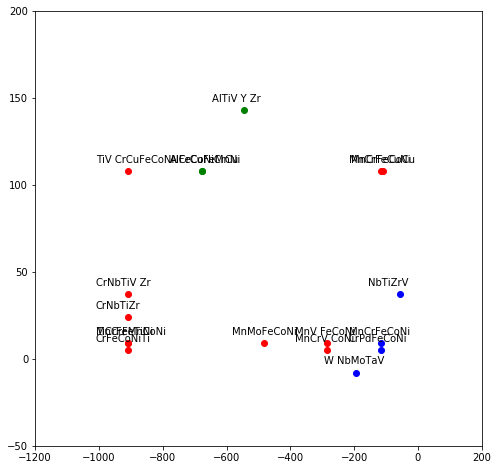

In [8]:
#now use this to examine lists of HEAs

#get list of compounds
#compounds = read_compounds('HEA-SS.txt')
compound_list = ["MnCrFeCoNi",\
    "CrPdFeCoNi",
    "W NbMoTaV ",
    #"FeCoCrNiMnCu",
    "NbTiZrV "
                ]

compound_list_bad = ['MnCrFeCuNi',
'NbCrFeMnCoNi',
'TiCrFeMnCoNi',
'AlCrCuFeMnNi',
'TiV CrCuFeCoNi',
'AlTiV Y Zr',
'AlFeCoNiCrCu',
'CrFeCoNiTi',
'MnCrFeTiNi',
'MnMoFeCoNi',
'MnV FeCoNi',
'MnCrV CoNi',
'MnCrFeCoCu',
'CrNbTiZr',
"CrNbTiV Zr"
]
#print(compound_list)


xmin=-1200
xmax = 200
ymin=-50
ymax = xmax
plt.figure(figsize = (8,8))

c_list = []
for i in compound_list_bad:
    #print(i)
    c_list.append (compound(i))

print("Bad list:")
for c in c_list:
    cmin = min(c.enth_list)
    cmax = max(c.enth_list)
    print (f"{c.name:12} \t {c.enth_dict[cmin]} \t {cmin:5.1f} \t {c.enth_dict[cmax]} \t {max(c.enth_list)}")
    if('Al' in c.elem_list):
        plt.plot(cmin,cmax,"go")
        #print(c.name)
    else:
        plt.plot(cmin,cmax,"ro")

    if xmin < cmin < xmax and ymin < cmax < ymax:
        plt.text(cmin -100, cmax +5 , c.name, fontsize=10)

c_list = []
for i in compound_list:
    #print(i)
    c_list.append (compound(i))

print("Good list:")

for c in c_list:
    cmin = min(c.enth_list)
    cmax = max(c.enth_list)
    print (f"{c.name:12} \t {c.enth_dict[cmin]} \t {cmin:5.1f} \t {c.enth_dict[cmax]} \t {max(c.enth_list)}")
    if('Al' in c.elem_list):
        plt.plot(cmin,cmax,"go")
        #print(c.name)
    else:
        plt.plot(cmin,cmax,"bo")

    if xmin < cmin < xmax and ymin < cmax < ymax:
        plt.text(cmin -100, cmax +5 , c.name, fontsize=10)
        #plt.text(cmin * (1 + 0.01), cmax * (1 + 0.01) , c.name, fontsize=10)
#    plt.text(cmin * (1 + 0.01), cmax * (1 + 0.01) , c.name, fontsize=10)

plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))
plt.show()    

    

Current directory is  C:\Users\a9j\Dropbox (Personal)\Python
Current directory is  C:\Users\a9j\Dropbox (Personal)\Python
AgAu         	 ('Ag', 'Au') 	 -85.0 	 ('Ag', 'Au')     	 -85.0 	 -85.0
CoFe         	 ('Co', 'Fe') 	 -60.0 	 ('Co', 'Fe')     	 -60.0 	 -60.0
CoNi         	 ('Co', 'Ni') 	 -21.0 	 ('Co', 'Ni')     	 -21.0 	 -21.0
CuNi         	 ('Cu', 'Ni') 	  -6.0 	 ('Cu', 'Ni')     	 -6.0 	 -6.0
FeNi         	 ('Fe', 'Ni') 	 -97.0 	 ('Fe', 'Ni')     	 -97.0 	 -97.0
CoCrNi       	 ('Cr', 'Ni') 	 -30.0 	 ('Co', 'Cr')     	 5.0 	 -15.333333333333334
CoFeNi       	 ('Fe', 'Ni') 	 -97.0 	 ('Co', 'Ni')     	 -21.0 	 -59.333333333333336
CrFeNi       	 ('Fe', 'Ni') 	 -97.0 	 ('Cr', 'Fe')     	 -8.0 	 -45.0
CoCrFeNi     	 ('Fe', 'Ni') 	 -97.0 	 ('Co', 'Cr')     	 5.0 	 -35.166666666666664
CoCrMnNi     	 ('Mn', 'Ni') 	 -115.0 	 ('Co', 'Cr')     	 5.0 	 -48.333333333333336
CoFeMnNi     	 ('Mn', 'Ni') 	 -115.0 	 ('Fe', 'Mn')     	 9.0 	 -50.5
CoFeNiPd     	 ('Fe', 'Pd') 	 -116.0 	 ('Ni', 'Pd'

NiTiZrAl     	 ('Ni', 'Al') 	 -677.0 	 ('Ti', 'Zr')     	 24.0 	 -419.6666666666667
ZrTiAlCuNi   	 ('Zr', 'Ti') 	 -910.0 	 ('Cu', 'Ni')     	 -6.0 	 -399.8


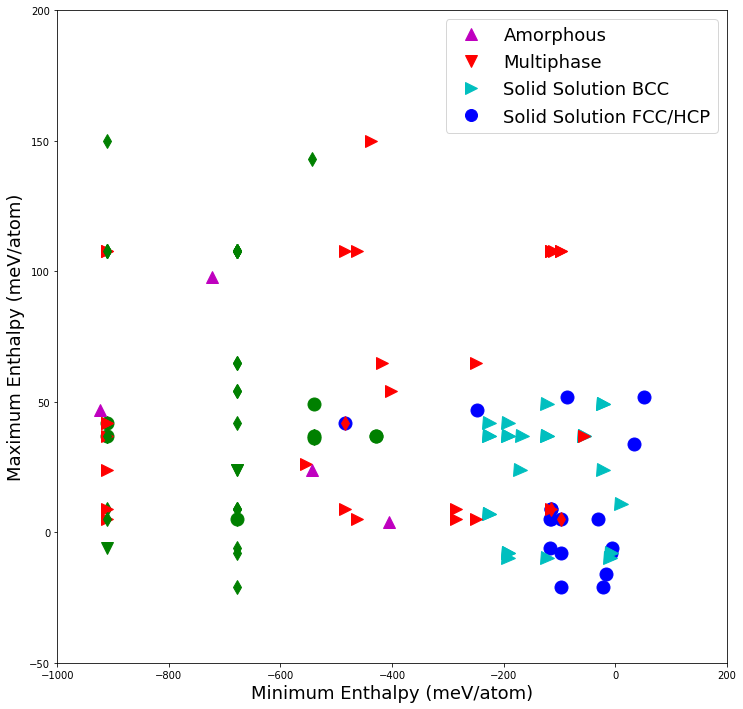

In [22]:
cwd = os.getcwd()
print ("Current directory is ",cwd)

#with open("HEA-work\Lederer-list.txt") as file:
gao_good_list_bcc = []
with open("HEA-work\Gao-good list-BCC.txt") as file:
    for line in file: 
        line = line.strip() #or some other preprocessing
        if line not in gao_good_list_bcc:
            gao_good_list_bcc.append(line) #storing everything in memory!
file.close()


gao_good_list = []
with open("HEA-work\Gao-good list.txt") as file:
    for line in file: 
        line = line.strip() #or some other preprocessing
        if line not in gao_good_list and line not in gao_good_list_bcc:
            gao_good_list.append(line) #storing everything in memory!
file.close()

gao_mixed = []

#with open("HEA-work\Lederer-list.txt") as file:
with open("HEA-work\gao-mixed.txt") as file:
    for line in file: 
        line = line.strip() #or some other preprocessing
        if line not in gao_mixed:
            gao_mixed.append(line) #storing everything in memory!
file.close()

gao_amorph = []
cwd = os.getcwd()
print ("Current directory is ",cwd)

#with open("HEA-work\Lederer-list.txt") as file:
with open("HEA-work\gao-amorph.txt") as file:
    for line in file: 
        line = line.strip() #or some other preprocessing
        if line not in gao_amorph:
            gao_amorph.append(line) #storing everything in memory!
file.close()


#print (led_list)

for l in gao_good_list:
    c = compound(l)
    cmin = min(c.enth_list)
    cmax = max(c.enth_list)
    print (f"{c.name:12} \t {c.enth_dict[cmin]} \t {cmin:5.1f} \t {c.enth_dict[cmax]} \
    \t {max(c.enth_list)} \t {c.avg_enth}")
    
plt.figure(figsize = (12,12))

c_list = []
for i in compound_list_bad:
    #print(i)
    c_list.append (compound(i))

plot_Al = True
ms = 12
print("\n Good list:")

for l in gao_good_list:
    c = compound(l)
    cmin = min(c.enth_list)
    cmax = max(c.enth_list)
    print (f"{c.name:12} \t {c.enth_dict[cmin]} \t {cmin:5.1f} \t {c.enth_dict[cmax]} \
    \t {max(c.enth_list)} \t {c.avg_enth}")
    if not ('Al' in c.elem_list):
        plt_good = plt.plot(cmin,cmax,"bo", markersize=ms+1)
        #print(c.name)
    elif plot_Al:
        plt_good = plt.plot(cmin,cmax,"go",markersize=ms+1)
        
    #if xmin < cmin < xmax and ymin < cmax < ymax:
    #if cmin < -300:
        #plt.text(cmin -100, cmax +5 , c.name, fontsize=10)
        #plt.text(cmin * (1 + 0.01), cmax * (1 + 0.01) , c.name, fontsize=10)
#    plt.text(cmin * (1 + 0.01), cmax * (1 + 0.01) , c.name, fontsize=10)

print("\n Good list BCC:")

for l in gao_good_list_bcc:
    c = compound(l)
    cmin = min(c.enth_list)
    cmax = max(c.enth_list)
    print (f"{c.name:12} \t {c.enth_dict[cmin]} \t {cmin:5.1f} \t {c.enth_dict[cmax]} \
    \t {max(c.enth_list)} \t {c.avg_enth}")
    if not ('Al' in c.elem_list):
        plt_good = plt.plot(cmin,cmax,"c>", markersize=ms+1)
        #print(c.name)
    elif plot_Al:
        plt_good = plt.plot(cmin,cmax,"go",markersize=ms+1)

    #if xmin < cmin < xmax and ymin < cmax < ymax:
    #if cmin < -300:
        #plt.text(cmin -100, cmax +5 , c.name, fontsize=10)
        #plt.text(cmin * (1 + 0.01), cmax * (1 + 0.01) , c.name, fontsize=10)
#    plt.text(cmin * (1 + 0.01), cmax * (1 + 0.01) , c.name, fontsize=10)

print("\n Bad list:")
for l in gao_mixed:
    c = compound(l)
    cmin = min(c.enth_list)
    cmax = max(c.enth_list)
    print (f"{c.name:12} \t {c.enth_dict[cmin]} \t {cmin:5.1f} \t {c.enth_dict[cmax]} \
    \t {max(c.enth_list)} \t {c.avg_enth}")
    if('Al' not in c.elem_list):
        if l in gao_good_list:
            plot_mixed = plt.plot(cmin,cmax,"rd",markersize=ms-2)
        else:
            plot_mixed = plt.plot(cmin,cmax,"r>",markersize = ms)
    elif plot_Al:
        plot_mixed = plt.plot(cmin,cmax,"gd",markersize=ms-2)
        #print(c.name)
    #else:
    #    plt.plot(cmin,cmax,"gv")

    #if cmin > -280 and cmax < 40: #xmin < cmin < xmax and ymin < cmax < ymax:
        #plt.text(cmin -100, cmax +5 , c.name, fontsize=10)

print("\n Amorphous list:")
for l in gao_amorph:
    c = compound(l)
    cmin = min(c.enth_list)
    cmax = max(c.enth_list)
    print (f"{c.name:12} \t {c.enth_dict[cmin]} \t {cmin:5.1f} \t {c.enth_dict[cmax]} \
    \t {max(c.enth_list)} \t {c.avg_enth}")
    if('Al' not in c.elem_list):
        plt_amorph = plt.plot(cmin,cmax,"m^", markersize=ms)
        #print(c.name)
    elif plot_Al:
        plt_amorph = plt.plot(cmin,cmax,"gv", markersize=ms)


c_list = []
for i in compound_list:
    #print(i)
    c_list.append (compound(i))

fs = 18
#plt.legend((plot_mixed, plt_amorph, plt_good),('multiphase','amorphous','solid solution'),
           #scatterpoints=1,
           #loc='lower left',
           #ncol=3,
          # fontsize=fs)

plt.xlabel('Minimum Enthalpy (meV/atom)', fontsize = fs)
plt.ylabel('Maximum Enthalpy (meV/atom)', fontsize = fs)

xmin=-1000
xmax = 200
ymin=-50
ymax = xmax

plt_amorph = plt.plot(xmax*1.1,ymax,"m^",markersize=ms, label = "Amorphous")
plot_mixed = plt.plot(xmax*1.1,ymax,"rv",markersize=ms,label = "Multiphase")
plt_good = plt.plot(xmax*1.1,ymax,"c>", markersize=ms, label = "Solid Solution BCC")
plt_good = plt.plot(xmax*1.1,ymax,"bo", markersize=ms, label = "Solid Solution FCC/HCP")

plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))
plt.legend(fontsize = fs)
plt.show()    


AgAu         	 ('Ag', 'Au') 	 -85.0 	 ('Ag', 'Au')     	 -85.0 	 -85.0
CoFe         	 ('Co', 'Fe') 	 -60.0 	 ('Co', 'Fe')     	 -60.0 	 -60.0
CoNi         	 ('Co', 'Ni') 	 -21.0 	 ('Co', 'Ni')     	 -21.0 	 -21.0
CuNi         	 ('Cu', 'Ni') 	  -6.0 	 ('Cu', 'Ni')     	 -6.0 	 -6.0
FeNi         	 ('Fe', 'Ni') 	 -97.0 	 ('Fe', 'Ni')     	 -97.0 	 -97.0
CoCrNi       	 ('Cr', 'Ni') 	 -30.0 	 ('Co', 'Cr')     	 5.0 	 -15.333333333333334
CoFeNi       	 ('Fe', 'Ni') 	 -97.0 	 ('Co', 'Ni')     	 -21.0 	 -59.333333333333336
CrFeNi       	 ('Fe', 'Ni') 	 -97.0 	 ('Cr', 'Fe')     	 -8.0 	 -45.0
CoCrFeNi     	 ('Fe', 'Ni') 	 -97.0 	 ('Co', 'Cr')     	 5.0 	 -35.166666666666664
CoCrMnNi     	 ('Mn', 'Ni') 	 -115.0 	 ('Co', 'Cr')     	 5.0 	 -48.333333333333336
CoFeMnNi     	 ('Mn', 'Ni') 	 -115.0 	 ('Fe', 'Mn')     	 9.0 	 -50.5
CoFeNiPd     	 ('Fe', 'Pd') 	 -116.0 	 ('Ni', 'Pd')     	 -6.0 	 -51.666666666666664
AlCoCrFeNi   	 ('Al', 'Ni') 	 -677.0 	 ('Co', 'Cr')     	 5.0 	 -202.4
CoCrFeMnNi   	 (

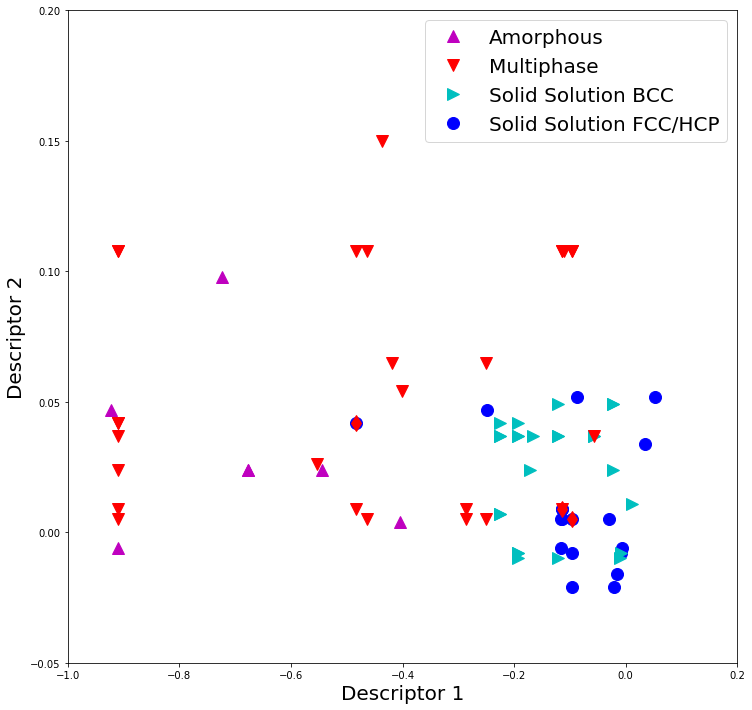

In [21]:
for l in gao_good_list:
    c = compound(l)
    cmin = min(c.enth_list)
    cmax = max(c.enth_list)
    print (f"{c.name:12} \t {c.enth_dict[cmin]} \t {cmin:5.1f} \t {c.enth_dict[cmax]} \
    \t {max(c.enth_list)} \t {c.avg_enth}")
    
plt.figure(figsize = (12,12))

c_list = []
for i in compound_list_bad:
    #print(i)
    c_list.append (compound(i))

ms = 12
scale = 1000.

print("\n Good list:")

for l in gao_good_list:
    c = compound(l)
    cmin = min(c.enth_list)
    cmax = max(c.enth_list)
    print (f"{c.name:12} \t {c.enth_dict[cmin]} \t {cmin:5.1f} \t {c.enth_dict[cmax]} \
    \t {max(c.enth_list)} \t {c.avg_enth}")
    if not ('Al' in c.elem_list):
        plt_good = plt.plot(cmin/scale,cmax/scale,"bo", markersize=ms)
        #print(c.name)
   # else:
   #     plt-good-Al = plt.scatter(cmin,cmax,"go",markersize=9)

    #if xmin < cmin < xmax and ymin < cmax < ymax:
    #if cmin < -300:
        #plt.text(cmin -100, cmax +5 , c.name, fontsize=10)
        #plt.text(cmin * (1 + 0.01), cmax * (1 + 0.01) , c.name, fontsize=10)
#    plt.text(cmin * (1 + 0.01), cmax * (1 + 0.01) , c.name, fontsize=10)

print("\n Good list BCC:")

for l in gao_good_list_bcc:
    c = compound(l)
    cmin = min(c.enth_list)
    cmax = max(c.enth_list)
    print (f"{c.name:12} \t {c.enth_dict[cmin]} \t {cmin:5.1f} \t {c.enth_dict[cmax]} \
    \t {max(c.enth_list)} \t {c.avg_enth}")
    if not ('Al' in c.elem_list):
        plt_good = plt.plot(cmin/scale,cmax/scale,"c>", markersize=ms)
        #print(c.name)
   # else:
   #     plt-good-Al = plt.scatter(cmin,cmax,"go",markersize=9)

    #if xmin < cmin < xmax and ymin < cmax < ymax:
    #if cmin < -300:
        #plt.text(cmin -100, cmax +5 , c.name, fontsize=10)
        #plt.text(cmin * (1 + 0.01), cmax * (1 + 0.01) , c.name, fontsize=10)
#    plt.text(cmin * (1 + 0.01), cmax * (1 + 0.01) , c.name, fontsize=10)

print("\n Bad list:")
for l in gao_mixed:
    c = compound(l)
    cmin = min(c.enth_list)
    cmax = max(c.enth_list)
    print (f"{c.name:12} \t {c.enth_dict[cmin]} \t {cmin:5.1f} \t {c.enth_dict[cmax]} \
    \t {max(c.enth_list)} \t {c.avg_enth}")
    if('Al' not in c.elem_list):
        if l in gao_good_list:
            plot_mixed = plt.plot(cmin/scale,cmax/scale,"rd",markersize=ms)
        else:
            plot_mixed = plt.plot(cmin/scale,cmax/scale,"rv",markersize=ms)
        #print(c.name)
    #else:
    #    plt.plot(cmin,cmax,"gv")

    #if cmin > -280 and cmax < 40: #xmin < cmin < xmax and ymin < cmax < ymax:
        #plt.text(cmin -100, cmax +5 , c.name, fontsize=10)

print("\n Amorphous list:")
for l in gao_amorph:
    c = compound(l)
    cmin = min(c.enth_list)
    cmax = max(c.enth_list)
    print (f"{c.name:12} \t {c.enth_dict[cmin]} \t {cmin:5.1f} \t {c.enth_dict[cmax]} \
    \t {max(c.enth_list)} \t {c.avg_enth}")
    if('Al' in c.elem_list):
        plt_amorph = plt.plot(cmin/scale,cmax/scale,"m^", markersize=ms)
        #print(c.name)
    else:
        plt_amorph = plt.plot(cmin/scale,cmax/scale,"m^", markersize=ms)


c_list = []
for i in compound_list:
    #print(i)
    c_list.append (compound(i))

fs = 20
#plt.legend((plot_mixed, plt_amorph, plt_good),('multiphase','amorphous','solid solution'),
           #scatterpoints=1,
           #loc='lower left',
           #ncol=3,
          # fontsize=fs)

plt.xlabel('Descriptor 1', fontsize = fs)
plt.ylabel('Descriptor 2', fontsize = fs)

xmin=-1000./scale
xmax = 200./scale
ymin=-50./scale
ymax = xmax

plt_amorph = plt.plot(xmax*1.1,ymax,"m^",markersize=ms, label = "Amorphous")
plot_mixed = plt.plot(xmax*1.1,ymax,"rv",markersize=ms,label = "Multiphase")
plt_good = plt.plot(xmax*1.1,ymax,"c>", markersize=ms, label = "Solid Solution BCC")
plt_good = plt.plot(xmax*1.1,ymax,"bo", markersize=ms, label = "Solid Solution FCC/HCP")

plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))
plt.legend(fontsize = fs)
plt.show()    


In [ ]:
with open('C:\Users\a9j\Dropbox (Personal)\Python\HEA-work\Lederer-partial-list.txt') as f:
    read_data = f.read()
f.close()
print (read_data)

In [ ]:
c = compound("FeCoCuMnTi")
cmin = min(c.enth_list)
cmax = max(c.enth_list)
print (f"{c.name:12} \t {cmin:5.1f} \t {c.enth_dict[cmin]} \t {c.enth_dict[cmax]} \t {max(c.enth_list)}")